In [1]:
import os
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
from get_sb_fcs import *

%matplotlib inline
plt.rcParams['figure.dpi'] = 150

with open('elem_props.p', 'rb') as fr:
    struc_dict = pickle.load(fr)

## Plot Bending-Stretching terms

In [2]:
for name, sb_fcs in struc_dict.items():
    print(name)
    print('Stretching, Bending, Distance')
    distances = sb_fcs.distances_nn_sb_fcs[0][0]
    sb_fcs_plt = sb_fcs.nn_sb_fcs[0][0]
    for j, neighbor in enumerate(sb_fcs_plt[1:]):
        print(f"{j+1}NN: {neighbor[2,2]:.4f},, {neighbor[0,0]:.4f}, {distances[j+1]:.4f}")
    print('')

Ag
Stretching, Bending, Distance
1NN: -1.3309,, 0.1061, 2.9235
2NN: -0.0631,, 0.0272, 4.1345
3NN: -0.0497,, -0.0016, 5.0637

Al
Stretching, Bending, Distance
1NN: -1.2705,, 0.0872, 2.8566
2NN: -0.0715,, -0.0092, 4.0398
3NN: 0.0528,, -0.0034, 4.9478

Au
Stretching, Bending, Distance
1NN: -1.8094,, 0.2592, 2.9340
2NN: -0.1858,, 0.0484, 4.1494
3NN: -0.0325,, -0.0060, 5.0819

Ca
Stretching, Bending, Distance
1NN: -0.4843,, -0.0278, 3.9034
2NN: 0.1269,, 0.0010, 5.5202
3NN: -0.0191,, 0.0031, 6.7609

Cu
Stretching, Bending, Distance
1NN: -1.7024,, 0.0825, 2.5661
2NN: -0.0024,, 0.0308, 3.6289
3NN: -0.0498,, -0.0049, 4.4445

Ir
Stretching, Bending, Distance
1NN: -2.9599,, 0.1534, 2.7364
2NN: -1.0304,, 0.3374, 3.8699
3NN: -0.3164,, -0.0288, 4.7396

Ni
Stretching, Bending, Distance
1NN: -2.2766,, 0.1176, 2.4846
2NN: -0.1124,, 0.0408, 3.5137
3NN: -0.1705,, 0.0170, 4.3034

Pb
Stretching, Bending, Distance
1NN: -0.2098,, 0.0265, 3.5425
2NN: -0.0541,, -0.0367, 5.0099
3NN: -0.0727,, 0.0037, 6.1358

Pd

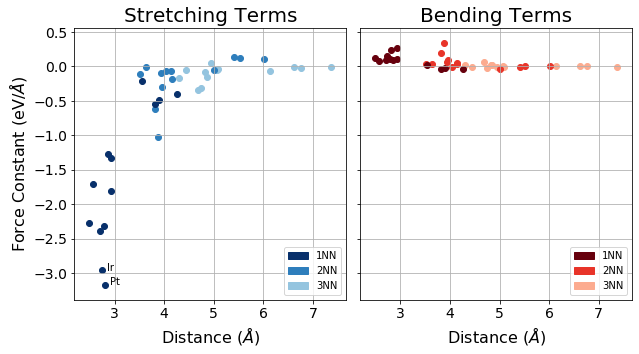

In [3]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10,5))
plt.subplots_adjust(wspace=0.05)
blues = cm.Blues(np.linspace(1, 0.4, 3))
reds = cm.Reds(np.linspace(1, 0.3, 3))

ax1, ax2 = axes
ax1.set_title('Stretching Terms', fontsize=20)
ax2.set_title('Bending Terms', fontsize=20)
ax1.set_ylabel('Force Constant (eV/$\AA$)', fontsize=16)
for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_xlabel('Distance ($\AA$)', fontsize=16)
    ax.grid()
s1 = mplt.patches.Patch(color=blues[0], label='1NN')
s2 = mplt.patches.Patch(color=blues[1], label='2NN')
s3 = mplt.patches.Patch(color=blues[2], label='3NN')
b1 = mplt.patches.Patch(color=reds[0], label='1NN')
b2 = mplt.patches.Patch(color=reds[1], label='2NN')
b3 = mplt.patches.Patch(color=reds[2], label='3NN')
ax1.legend(handles=[s1, s2, s3], loc='lower right')
ax2.legend(handles=[b1, b2, b3], loc='lower right')

for name, sb_fcs in struc_dict.items():
    distances = sb_fcs.distances_nn_sb_fcs[0][0]
    sb_fcs_plt = sb_fcs.nn_sb_fcs[0][0]
    for j, neighbor in enumerate(sb_fcs_plt[1:]):
        ax1.scatter(distances[j+1], neighbor[2,2], color=blues[j])
        if neighbor[2,2] < -2.5:
            ax1.annotate(name, (distances[j+1]+0.1, neighbor[2,2]))
        ax2.scatter(distances[j+1], neighbor[0,0], color=reds[j])
plt.show()
fig.savefig('stretching_bending.pdf')